# Практическая работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0383 Смирнов Иван и Позолотин Константин. Вариант №5.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Аналоговый сигнал** — это сигнал, который изменяется непрерывно во времени.

**Дискретный сигнал** — это сигнал, который изменяется только в определенные моменты времени, при этом его состояние остается непрерывным между этими моментами.

**Цифровой сигнал** — это сигнал, который имеет дискретные значения как по времени, так и по состоянию.

**Единичный цифровой импульс** (аналог дельта-функции):
$$\delta_d(k) = \begin{cases}1, & k = 0,\\0, & k \neq 0.\end{cases}, \quad k = ..., -2, -1, 0, 1, 2,...$$

**Дискретный единичный скачок** (аналог функции единичного скачка):
$$\sigma_d(k) = \begin{cases}1, & k\geq0,\\ 0,& k < 0.\end{cases}, \quad k = ..., -2, -1, 0, 1, 2,...$$

**Дискретная экспоненциальная функция** (аналог экспоненциальной функции):
$$s_1(k) = \begin{cases}0, & k < 0,\\ a^k, & k \ge 0\end{cases}, \quad k = ..., -2, -1, 0, 1, 2,...$$

**Дискретный комплексный гармонический сигнал** (аналог функции синуса и косинуса):
$$s_2(k)=C\exp(j\hatω_0k), \quad k = ..., -2, -1, 0, 1, 2,...$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

### Единичный цифровой импульс

Настройка значений переменных программы

In [29]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N_br = 5
N = 30 + N_br % 5
T = 0.0005 * (1 + N_br % 3)
a = (-1)**N_br * (0.8 + 0.005 * (N_br % 20))
C = 1 + N_br % 5
w0 = np.pi / (6 + N_br % 5)
m = 5 + N_br % 5

In [30]:
print(f'N_br:\t\t{N_br}\nN:\t\t{N}\nT:\t\t{T}\na:\t\t'
      f'{a}\nC:\t\t{C}\nw0:\t\t{w0}\nm:\t\t{m}\n')

N_br:		5
N:		30
T:		0.0015
a:		-0.8250000000000001
C:		1
w0:		0.5235987755982988
m:		5



Единичный цифровой импульс:

In [31]:
imp = signal.unit_impulse(N)

Построение графика на дискретном времени:

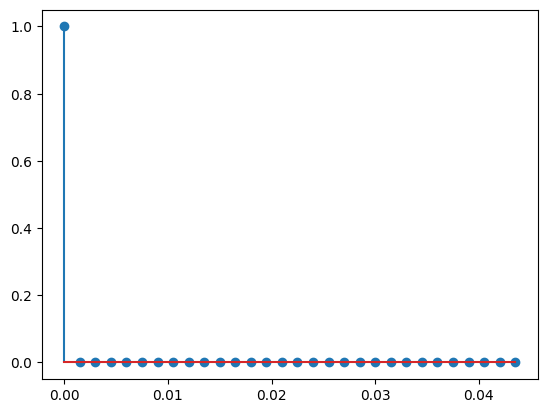

In [32]:
plt.stem(np.arange(N)*T, imp)
plt.show()

Построение графика на дискретном нормированном времени:

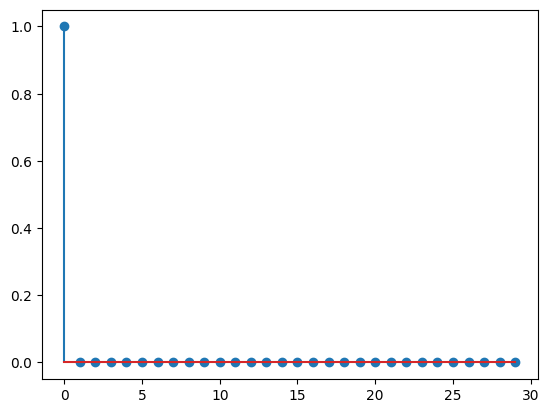

In [33]:
plt.stem(np.arange(N), imp)
plt.show()

a. Взаимосвязь между дискретным и дискретным нормированным временем:

дискретное нормированное время, это дискретное время с периодом дескритизации $Т = 1$

b. Различие между единичным цифровым импульсом и дельта-функцией

в выделенной точке единичный цифровой импульс равен единице, а дельта-функция бесконечности

### Дискретный единичный скачок

Дискретный единичный скачок:

In [34]:
step = np.array([0 if x < 0 else 1 for x in range(N)])

Построение графика на дискретном времени:

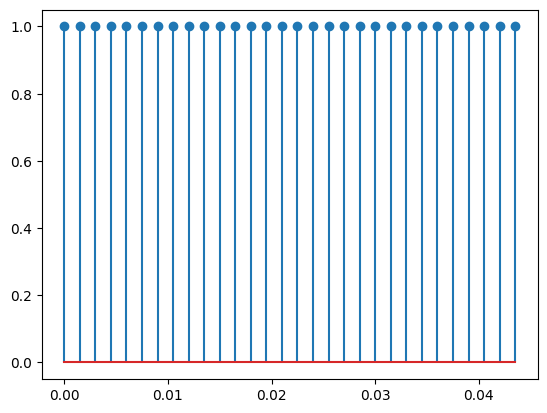

In [35]:
plt.stem(np.arange(N)*T, step)
plt.show()

Построение графика на дискретном нормированном времени:

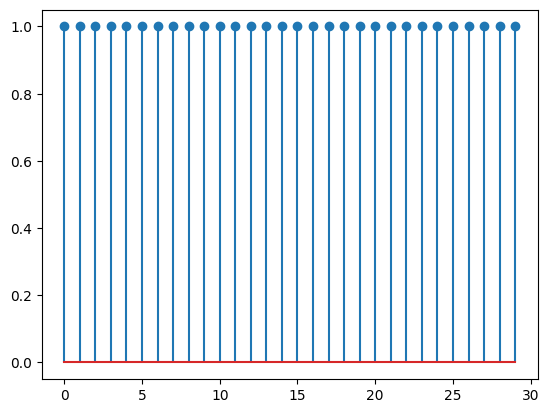

In [36]:
plt.stem(np.arange(N), step)
plt.show()

а. Соответствие между дискретным и аналоговым единичными скачками:

Аналоговая функция дискретного скачка определена на множестве действительных чисел, дискретная же - на множестве целых чисел. Дискретная функция равна единице в выделенной точке, аналоговая считается либо равной 0.5 либо неопределенной (хотя в пакете матлаб она так же равна единице)

b.Чему равна частота дискретизации дискретного единичного скачка:

$f_d = \frac{1}{T}$

In [37]:
1/T

666.6666666666666

### Моделирование дискретной экспоненциальной функции.

Дискретная экспоненциальная функция представляет собой аналог экспоненциальной функции в дискретной области. Основное отличие заключается в том, что при отрицательных значениях переменной $k$ аналоговая экспоненциальная функция имеет значения, равные $a$ в степени $k$, в то время как дискретная экспоненциальная функция имеет нулевые значения для отрицательных значений $k$.

In [38]:
k = np.arange(N)
t = k * T

digital_time = []
digital_normal_time = []

for i in range(N):
    digital_time.append(a**(i * T))

for i in range(N):
    digital_normal_time.append(a**(i))

Дискретное время:

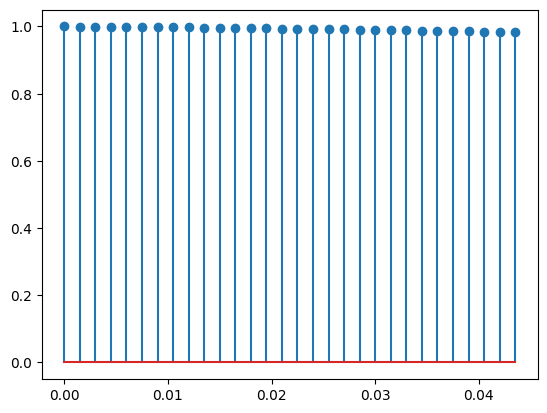

In [39]:
plt.stem(t, digital_time)
plt.show()

Нормированное дискретное время:

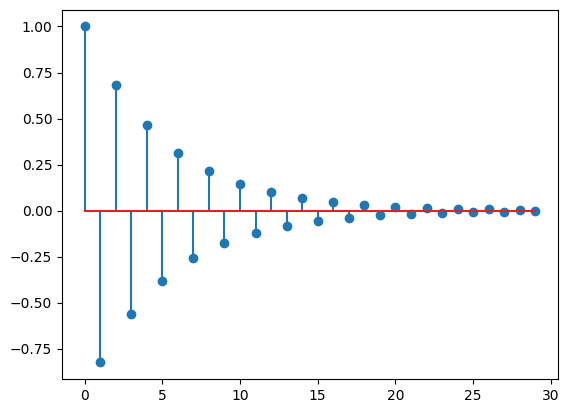

In [40]:
plt.stem(k, digital_normal_time)
plt.show()

### Моделирование дискретного комплексного гармонического сигнала.

Дискретный комплексный гармонический сигнал представляет собой дискретную версию гармонических функций, таких как синус и косинус. Его вещественная часть описывается как $cos(\hatω_0k)$, а мнимая часть как $sin(\hatω_0k)$. Можно также выразить его как $f(k) = C\exp(j\hatω_0k) = C(cos(\hatω_0k) + jsin(\hatω_0k))$.

In [41]:
import numpy

exponential_discrete = []
exponential_normal_discrete = []


for i in range(N):
    exponential_normal_discrete.append(C * numpy.exp(1j * w0 * i))

Вещественная часть:

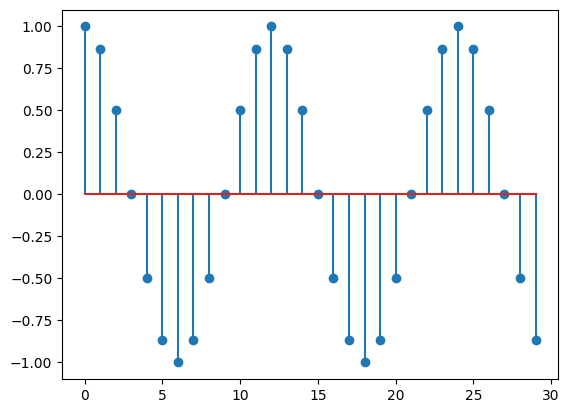

In [42]:
plt.stem(k, numpy.real(exponential_normal_discrete))
plt.show()

Мнимая часть:

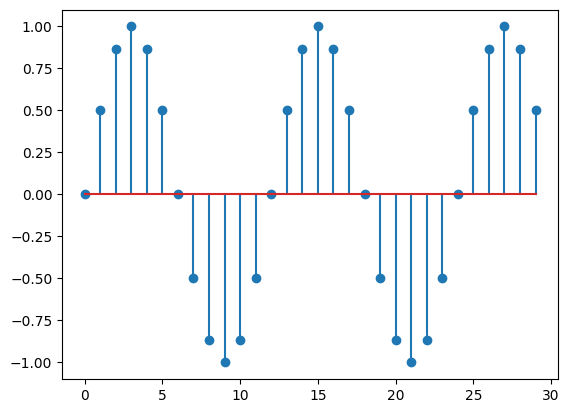

In [43]:
plt.stem(k, numpy.imag(exponential_normal_discrete))
plt.show()

### Вывод графиков задержанных последовательностей.

Единичный цифровой импульс:

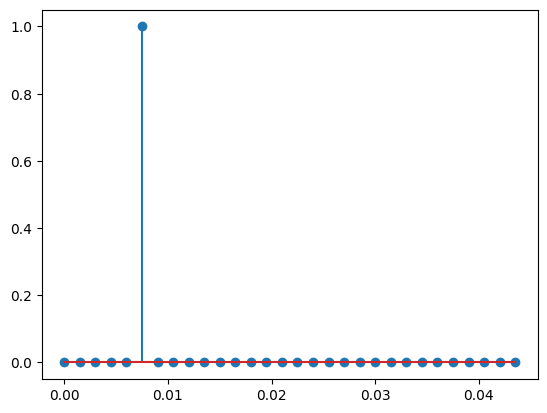

In [44]:
discrete_time_delay = [(k - m) for k in range(N)]


impulse_signal = []

for i in discrete_time_delay:
    if i == 0:
        impulse_signal.append(1)
    else:
        impulse_signal.append(0)

plt.stem(t,  impulse_signal)
plt.show()


Дискретный единичный скачок:

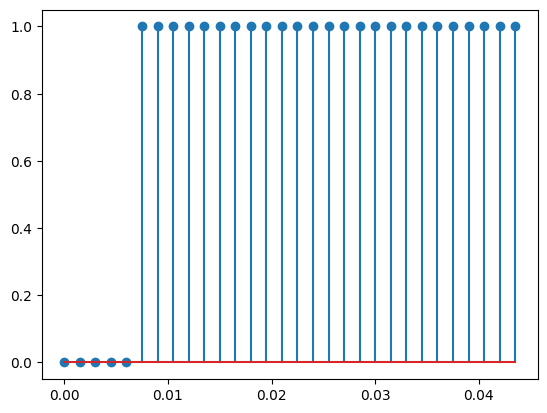

In [45]:
time_delayed_step = []

for i in discrete_time_delay:
    if i >= 0:
        time_delayed_step.append(1)
    else:
        time_delayed_step.append(0)


plt.stem(t, time_delayed_step)
plt.show()


Дискретная экспоненциальная функция:

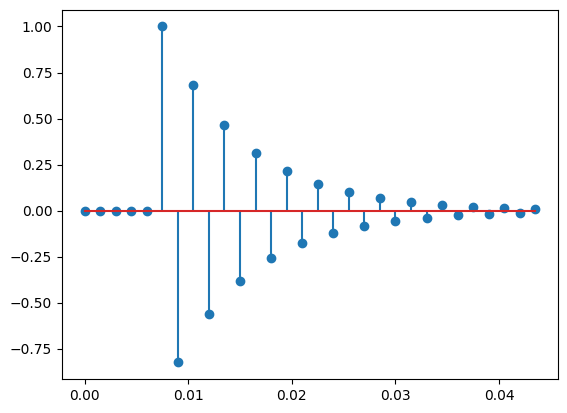

In [46]:
exponential_delay = []

for i in discrete_time_delay:
    if i < 0:
        exponential_delay.append(0)
    else:
        exponential_delay.append(a**i)


plt.stem(t, exponential_delay)
plt.show()

## Выводы

В результате выполнения практической работы были изучены математические описания стандартных дискретных сигналов и приобретены навыки моделирования с использованием программных средств, таких как Jupyter Notebook и библиотека matplotlib. В ходе работы были созданы модели единичного цифрового импульса, дискретного единичного скачка, дискретной экспоненциальной функции и дискретного комплексного гармонического сигнала. Каждый из этих сигналов был сравнен с его аналоговой версией, то есть с функцией Дирака, функцией Хевисайда, экспоненциальной функцией и функциями синуса и косинуса.

В процессе выполнения работы были предоставлены определения дискретизации, частоты дискретизации и периода дискретизации. Также было установлено соответствие между дискретным временем и дискретным нормированным временем. Кроме того, в рамках практической работы были созданы и проанализированы сигналы с задержкой.